In [4]:
#loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings("ignore")
import time

%matplotlib inline

plt.style.use("ggplot")
from pandas import read_csv

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [14]:
from sklearn.datasets.samples_generator import make_blobs

In [18]:
X,y=make_blobs(n_samples=40,centers=2,random_state=20)

In [19]:
df=pd.concat([pd.DataFrame(X),pd.DataFrame(y)],axis=1)

In [22]:
df.columns=['x1','x2','Target']

In [23]:
df

,x1,x2,Target
0,1.718421,9.521907,0
1,9.132044,5.321948,1
2,8.687708,7.797893,1
3,2.813725,8.360643,0
4,7.275429,6.318258,1
5,0.483113,8.199990,0
6,7.929403,6.088429,1
7,2.695482,10.014113,0
8,2.265713,8.360689,0
9,0.827678,6.341284,0


In [24]:
df.shape

(40, 3)

In [25]:
df.head()
df.tail()


,x1,x2,Target
0,1.718421,9.521907,0
1,9.132044,5.321948,1
2,8.687708,7.797893,1
3,2.813725,8.360643,0
4,7.275429,6.318258,1


,x1,x2,Target
35,7.001922,6.430797,1
36,9.035126,7.668546,1
37,1.519277,7.824244,0
38,6.975839,5.803604,1
39,7.591145,6.776494,1


In [26]:
df.columns

Index(['x1', 'x2', 'Target'], dtype='object')

In [28]:
df.describe()

,x1,x2,Target
count,40.000000,40.000000,40.00000
mean,4.887273,7.039031,0.50000
std,3.249395,1.388561,0.50637
min,0.483113,3.612384,0.00000
25%,1.848151,6.260801,0.00000
50%,4.615489,6.879831,0.50000
75%,8.014212,7.833552,1.00000
max,9.925280,10.014113,1.00000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
x1        40 non-null float64
x2        40 non-null float64
Target    40 non-null int32
dtypes: float64(2), int32(1)
memory usage: 880.0 bytes


In [30]:
df.isna().sum()

x1        0
x2        0
Target    0
dtype: int64

In [32]:
df['Target'].value_counts()#balanced data set

1    20
0    20
Name: Target, dtype: int64

# FIT THE MODEL

In [33]:
from sklearn import svm
from sklearn.svm import SVC


In [35]:
cl=SVC(kernel='linear',C=1)

In [36]:
cl.fit(X,y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

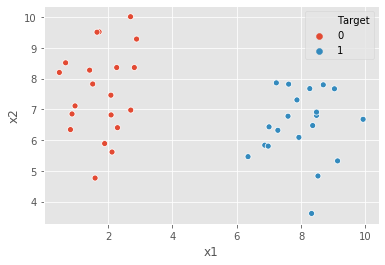

In [41]:
sns.scatterplot(x='x1',y='x2',hue='Target',data=df);

In [42]:
new_data = [[3.5,2.1],[4.5,3.2]]

In [43]:
cl.predict(new_data)

array([1, 1])

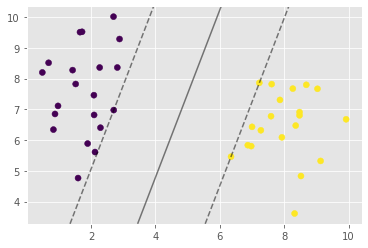

In [47]:
#display the data
plt.scatter(X[:,0],X[:,1],c=y)
#plot the decision boundary 
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate the model
xx = np.linspace(xlim[0],xlim[1],30)
yy = np.linspace(ylim[0],ylim[1],30)

YY,XX =  np.meshgrid(yy,xx)

xy = np.vstack([XX.ravel(),YY.ravel()]).T

Z = cl.decision_function(xy).reshape(XX.shape)

#plot decision boundary and margins
ax.contour(XX,YY,Z,colors ='k',levels = [-1,0,1],
           alpha=0.5,linestyles = ['--','-','--'])

#plot the support vectors
ax.scatter(cl.support_vectors_[:,0],cl.support_vectors_[:,1],
          s=100,linewidth = 2,facecolors = 'none')

plt.show();

In [48]:
cl.support_vectors_

array([[2.70208537, 6.97579352],
       [6.34822954, 5.46058533],
       [7.22830657, 7.86147791]])

In [49]:
cl.support_

array([33, 27, 28])

In [50]:
df.iloc[[33,27,28]]

,x1,x2,Target
33,2.702085,6.975794,0
27,6.348230,5.460585,1
28,7.228307,7.861478,1
